# GABOR

In [18]:
from skimage.feature import hog
from skimage.feature import local_binary_pattern
import cv2 
import os
from sklearn import svm
from sklearn import metrics
import numpy as np
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
import numpy as np 
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import joblib

In [19]:
# GABOR KERNEL
def gabor(folder_name, suf_path, eqhist=True):
    i=0
    currentframe =1
    for filename in os.listdir(folder_name):
        #path
        path=os.path.join(folder_name,filename)
        a=cv2.imread(path)
        
        a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        
        if eqhist:
            a = cv2.equalizeHist(a)
        a = cv2.resize(a, (300,300))
        
        for ang in range(1,2):
            ksize = 3  #Use size that makes sense to the image and fetaure size. Large may not be good. 
            #On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
            sigma = 2 #Large sigma on small features will fully miss the features. 
            theta = ang*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
            lamda = 1*np.pi /4  #1/4 works best for angled. 
            gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
            #Value of 1, spherical may not be ideal as it picks up features from other regions. 
            phi = 0  #Phase offset. I leave it to 0. 

            kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
            fimg = cv2.filter2D(a, cv2.CV_8UC3, kernel)
            name = "C:\\Users\\prathamesh\\Desktop\\CP\\Datasets\\Gabor Data\\"+ suf_path + str(currentframe) + '.png'
            print ('Creating...' + name)

            cv2.imwrite(name, fimg)
            currentframe=currentframe+1;
            i=i+1
            if i==3000:
                break;

In [38]:
#Gathering Training Data
gabor(r"C:\Users\prathamesh\Desktop\CP\Datasets\Common Dataset\Train\Adult", "Train\\Adult\\")

gabor(r"C:\Users\prathamesh\Desktop\CP\Datasets\Common Dataset\Train\Old", "Train\\Old\\")

gabor(r"C:\Users\prathamesh\Desktop\CP\Datasets\Common Dataset\Train\Young", "Train\\Young\\")


Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\1.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\2.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\3.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\4.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\5.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\6.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\7.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\8.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\9.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\10.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\11.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\12.png
Creating...C:\Users\prathamesh\Deskto

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\103.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\104.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\105.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\106.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\107.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\108.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\109.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\110.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\111.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\112.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\113.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Adult\114.png
Creating...C:\Us

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\27.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\28.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\29.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\30.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\31.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\32.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\33.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\34.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\35.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\36.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\37.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Old\38.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\G

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\52.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\53.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\54.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\55.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\56.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\57.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\58.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\59.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\60.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\61.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\62.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\63.png
Creating...C:\Users\prathame

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\159.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\160.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\161.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\162.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\163.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\164.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\165.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\166.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\167.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\168.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\169.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\170.png
Creating...C:\Us

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\260.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\261.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\262.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\263.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\264.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\265.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\266.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\267.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\268.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\269.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\270.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\271.png
Creating...C:\Us

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\366.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\367.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\368.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\369.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\370.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\371.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\372.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\373.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\374.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\375.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\376.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\377.png
Creating...C:\Us

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\466.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\467.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\468.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\469.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\470.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\471.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\472.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\473.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\474.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\475.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\476.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\477.png
Creating...C:\Us

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\572.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\573.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\574.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\575.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\576.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\577.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\578.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\579.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\580.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\581.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\582.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\Young\583.png
Creating...C:\Us

In [21]:
#Gathering Testing Data
gabor(r"C:\Users\prathamesh\Desktop\CP\Datasets\Common Dataset\Test\Adult", "Test\\Adult\\")

gabor(r"C:\Users\prathamesh\Desktop\CP\Datasets\Common Dataset\Test\Old", "Test\\Old\\")

gabor(r"C:\Users\prathamesh\Desktop\CP\Datasets\Common Dataset\Test\Young", "Test\\Young\\")


Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\1.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\2.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\3.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\4.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\5.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\6.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\7.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\8.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\9.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\10.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\11.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Adult\12.png
Creating...C:\Users\prathamesh\Desktop\CP\Dataset

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\26.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\27.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\28.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\29.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\30.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\31.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\32.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\33.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Old\34.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\1.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\2.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\3.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\96.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\97.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\98.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\99.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\100.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\101.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\102.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\103.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\104.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\105.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\106.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\107.png
Creating...C:\Users\prathamesh\D

Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\199.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\200.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\201.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\202.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\203.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\204.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\205.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\206.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\207.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\208.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\209.png
Creating...C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\Young\210.png
Creating...C:\Users\prathame

In [22]:
print(os.listdir(r"C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data"))

['Test', 'Train']


In [23]:
#Start by creating empty lists.
train_images = []
train_labels = [] 

In [24]:
for directory_path in glob.glob(r"C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Train\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (300, 300)) #Resize images
        train_images.append(img.flatten())
        train_labels.append(label)

Adult
Old
Young


In [25]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [26]:
print(train_images)
print(train_labels)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
['Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adu

In [27]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []

In [29]:
for directory_path in glob.glob(r"C:\Users\prathamesh\Desktop\CP\Datasets\Gabor Data\Test\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (300, 300)) #Resize images
        test_images.append(img.flatten())
        test_labels.append(label)

Adult
Old
Young


In [30]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [31]:
print(test_images)
print(test_labels)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
['Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult' 'Adult'
 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old'
 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old' 'Old'
 'Old

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [33]:
print(le.transform(test_labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [34]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [35]:
#SVM Linear
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)
y_pred1 = svm_clf.predict(x_test)
print("Accuracy:  \t\t"+str(metrics.accuracy_score(y_test, y_pred1)))
print('Balanced accuracy: \t', metrics.balanced_accuracy_score(y_test, y_pred1))
print('Precision accuracy: \t', metrics.precision_score(y_test, y_pred1,average='macro'))
print("Recall Score: \t\t",metrics.recall_score(y_test, y_pred1,average='weighted'))
print("F1 Score: \t\t",metrics.f1_score(y_test, y_pred1,average='micro'))
print('\nConfusion Matrix: \n',confusion_matrix(y_test, y_pred1))

Accuracy:  		0.7366946778711485
Balanced accuracy: 	 0.4614595149354508
Precision accuracy: 	 0.8275681341719077
Recall Score: 		 0.7366946778711485
F1 Score: 		 0.7366946778711485

Confusion Matrix: 
 [[ 27   0  54]
 [  0   3  31]
 [  9   0 233]]


In [18]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
model_dt.fit(x_train, y_train)
joblib.dump(model_dt,"model_dt")

#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Accuracy:  \t\t"+str(metrics.accuracy_score(y_test, y_pred1)))
print('Balanced accuracy: \t', metrics.balanced_accuracy_score(y_test, y_pred1))
print('Precision accuracy: \t', metrics.precision_score(y_test, y_pred1,average='macro'))
print("Recall Score: \t\t",metrics.recall_score(y_test, y_pred1,average='weighted'))
print("F1 Score: \t\t",metrics.f1_score(y_test, y_pred1,average='micro'))
print('\nConfusion Matrix: \n',confusion_matrix(y_test, y_pred1))


Decision Tree Results
Decision Tree Accuracy:  80.83720930232559 %
Train Accuracy: 0.9715053763440861
Test Accuracy: 0.8083720930232559
Accuracy:  		0.8083720930232559
Balanced accuracy: 	 0.733
Precision accuracy: 	 0.49930491331601123
Recall Score: 		 0.8083720930232559
F1 Score: 		 0.8083720930232559

Confusion Matrix: 
 [[  62    1   37]
 [   5   38    7]
 [ 293   69 1638]]


In [19]:
#Random Forest classifier
model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Accuracy:  \t\t"+str(accuracy_score(y_test, y_pred2)))
print('Balanced accuracy: \t', metrics.balanced_accuracy_score(y_test, y_pred2))
print('Precision accuracy: \t', metrics.precision_score(y_test, y_pred2,average='macro'))
print("Recall Score: \t\t",metrics.recall_score(y_test, y_pred2,average='weighted'))
print("F1 Score: \t\t",metrics.f1_score(y_test, y_pred2,average='micro'))
print('\nConfusion Matrix: \n',confusion_matrix(y_test, y_pred2))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.9386046511627907
Accuracy:  		0.9386046511627907
Balanced accuracy: 	 0.7986666666666666
Precision accuracy: 	 0.7765451460963245
Recall Score: 		 0.9386046511627907
F1 Score: 		 0.9386046511627907

Confusion Matrix: 
 [[  68    0   32]
 [   0   38   12]
 [  84    4 1912]]


In [20]:
#KNN classifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train, y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Accuracy:  \t\t"+str(accuracy_score(y_test, y_pred3)))
print('Balanced accuracy: \t', metrics.balanced_accuracy_score(y_test, y_pred3))
print('Precision accuracy: \t', metrics.precision_score(y_test, y_pred3,average='macro'))
print("Recall Score: \t\t",metrics.recall_score(y_test, y_pred3,average='weighted'))
print("F1 Score: \t\t",metrics.f1_score(y_test, y_pred3,average='micro'))
print('\nConfusion Matrix: \n',confusion_matrix(y_test, y_pred3))

C:\Users\omkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy: 0.9758064516129032
Test Accuracy: 0.7344186046511628
Accuracy:  		0.7344186046511628
Balanced accuracy: 	 0.7223333333333334
Precision accuracy: 	 0.4338073503819288
Recall Score: 		 0.7344186046511628
F1 Score: 		 0.7344186046511628

Confusion Matrix: 
 [[  67    2   31]
 [   0   38   12]
 [ 257  269 1474]]


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
#xgboost classifier
model_xgboost = XGBClassifier().fit(x_train, y_train)
joblib.dump(model_xgboost,"model_xgboost")
y_pred5 = model_xgboost.predict(x_test)
print("XGboost")
print("Train Accuracy:",model_xgboost.score(x_train, y_train))
print("Test Accuracy:",model_xgboost.score(x_test, y_test))
print("Accuracy:  \t\t"+str(metrics.accuracy_score(y_test, y_pred5)))
print('Balanced accuracy: \t', metrics.balanced_accuracy_score(y_test, y_pred5))
print('Precision accuracy: \t', metrics.precision_score(y_test, y_pred5,average='macro'))
print("Recall Score: \t\t",metrics.recall_score(y_test, y_pred5,average='weighted'))
print("F1 Score: \t\t",metrics.f1_score(y_test, y_pred5,average='micro'))
print('\nConfusion Matrix: \n',confusion_matrix(y_test, y_pred5))

XGboost
Train Accuracy: 1.0
Test Accuracy: 0.7142857142857143
Accuracy:  		0.7142857142857143
Balanced accuracy: 	 0.4613914946654103
Precision accuracy: 	 0.664761396011396
Recall Score: 		 0.7142857142857143
F1 Score: 		 0.7142857142857143

Confusion Matrix: 
 [[ 31   0  50]
 [ 14   3  17]
 [ 20   1 221]]


[255 255 255 ... 255 255 255]


TypeError: Invalid shape (90000,) for image data

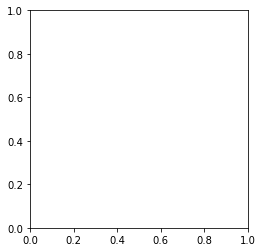

In [44]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
print(img)
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])